# 有限差分导数近似

在微积分中，函数的导数是通过极限定义的。  
$$f'(x)=\lim_{h\to0}\frac{f(x+h)-f(x)}{h}$$  

但是在计算机上，我们无法使用无穷小的$h$来求导，只能将$h$取为有限值对导数进行近似。
$$f'(x)\approx \frac{f(x+h)-f(x)}{h}$$

## 泰勒展开

我们可以利用泰勒展开在某一点附近近似函数：

$$f(x+h) = f(x) + hf'(x) + \frac{h^2}{2}f''(x) +\frac{h^3}{6}f'''(x)+\cdots+\frac{h^n}{n!}f^{(n)}(x) + \cdots$$

通常我们采用无穷小量来描述泰勒展开：

$$f(x+h) = f(x) + hf'(x) + \frac{h^2}{2}f''(x) + \frac{h^3}{6}f'''(x) + O(h^4)$$

为了方便理解，我们将以cos函数来展示这个误差
$$ \cos(0+h) = \cos0 -h\sin0 - \frac{h^2}{2!}\cos0 + \frac{h^3}{3!}\sin0 + O(h^4) $$

则：
$$cos(h)=1-\frac{h^2}{2}+O(h^4)$$

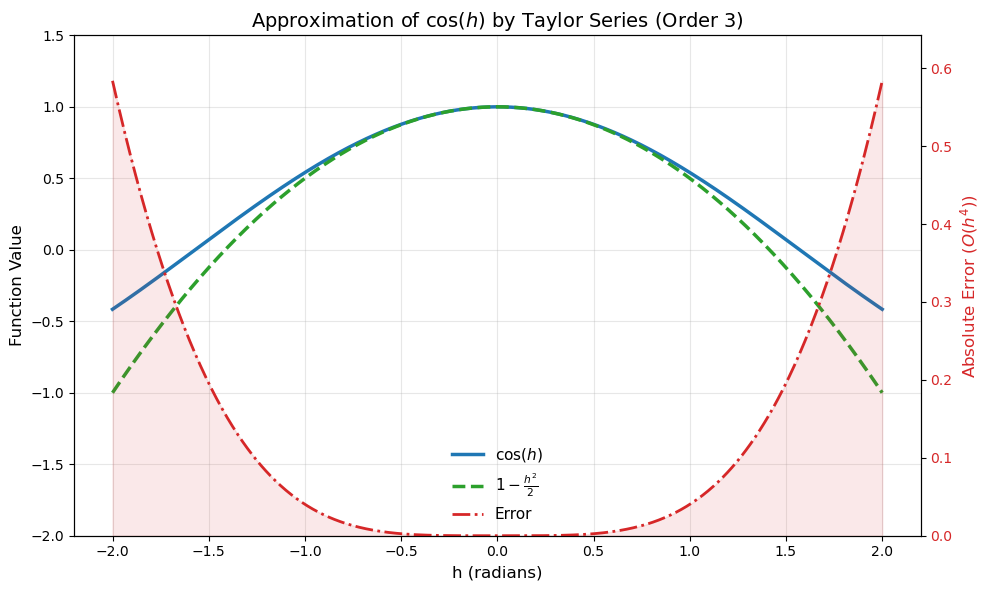

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 设置数据范围
# 我们选择 -2 到 2 的范围，这样可以清楚地看到在 h=0 附近非常贴合，
# 但随着 h 增大，误差迅速扩大的过程。
h = np.linspace(-2, 2, 1000)

# 2. 计算函数值
exact_cos = np.cos(h)                 # 真实的 cos(h)
taylor_approx = 1 - h**2 / 2          # 泰勒展开近似 (保留到二/三阶)

# 3. 计算误差 (绝对值)
error = np.abs(exact_cos - taylor_approx)

# 4. 绘图设置
fig, ax1 = plt.subplots(figsize=(10, 6))

# --- 左侧 Y 轴：显示函数值 ---
color_cos = 'tab:blue'
color_taylor = 'tab:green'

ax1.set_xlabel('h (radians)', fontsize=12)
ax1.set_ylabel('Function Value', color='black', fontsize=12)

# 绘制 cos(h)
line1, = ax1.plot(h, exact_cos, color=color_cos, linewidth=2.5, label=r'$\cos(h)$')
# 绘制 泰勒近似
line2, = ax1.plot(h, taylor_approx, color=color_taylor, linestyle='--', linewidth=2.5, label=r'$1 - \frac{h^2}{2}$')

ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(-2, 1.5) # 限制Y轴范围，避免泰勒级数下降太快导致cos图形被压缩
ax1.grid(True, alpha=0.3) # 添加淡网格

# --- 右侧 Y 轴：显示误差 ---
ax2 = ax1.twinx()  # 实例化共享 x 轴的第二个坐标轴
color_err = 'tab:red'

ax2.set_ylabel('Absolute Error ($O(h^4)$)', color=color_err, fontsize=12)
# 绘制误差曲线
line3, = ax2.plot(h, error, color=color_err, linestyle='-.', linewidth=2, label='Error')
# 填充误差区域，增强视觉效果
ax2.fill_between(h, error, color=color_err, alpha=0.1)

ax2.tick_params(axis='y', labelcolor=color_err)
ax2.set_ylim(0, max(error)*1.1) # 误差轴从0开始

# --- 合并图例 ---
lines = [line1, line2, line3]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower center', frameon=False, shadow=False, fontsize=11)

# --- 标题 ---
plt.title(r'Approximation of $\cos(h)$ by Taylor Series (Order 3)', fontsize=14)

plt.tight_layout()



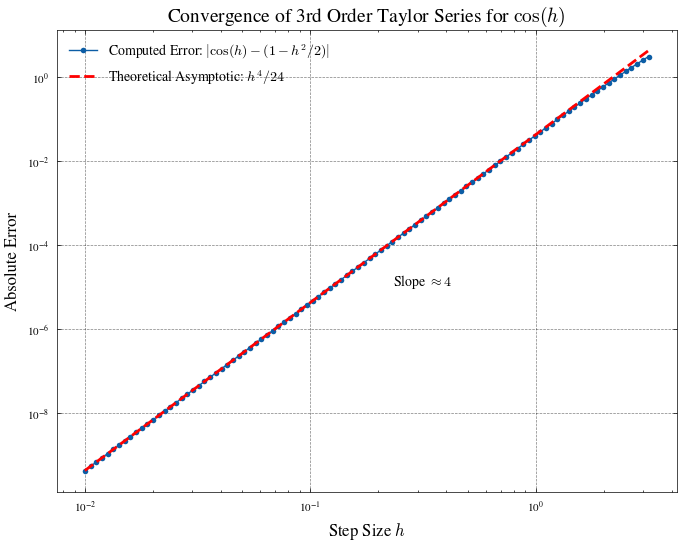

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

# 1. 准备数据
# 在对数坐标下，我们通常使用 logspace 生成点
# 从 10^-2 到 10^0.5 范围，涵盖从小误差到大误差的区间
h = np.logspace(-2, 0.5, 100)

# 计算真实值和近似值
exact_cos = np.cos(h)
taylor_approx = 1 - h**2 / 2

# 计算绝对误差
error = np.abs(exact_cos - taylor_approx)

# 2. 理论参考线 (Leading Order Error Term)
# 误差的主导项是 h^4 / 24 (即 h^4/4!)
theoretical_error = h**4 / 24

# 3. 绘图设置
# 使用 scienceplots 主题
# 如果你电脑没有安装 LaTeX，请使用 ['science', 'no-latex']
plt.style.use(['science','no-latex', 'grid'])
fig, ax = plt.subplots(figsize=(8, 6))

# 4. 绘制曲线
# 绘制实际计算的误差
ax.loglog(h, error, 'o-', markersize=4, label=r'Computed Error: $|\cos(h) - (1-h^2/2)|$', clip_on=False)

# 绘制理论上的 h^4 趋势线
ax.loglog(h, theoretical_error, 'r--', label=r'Theoretical Asymptotic: $h^4/24$', linewidth=2)

# 5. 添加辅助元素
ax.set_xlabel(r'Step Size $h$', fontsize=12)
ax.set_ylabel(r'Absolute Error', fontsize=12)
ax.set_title(r'Convergence of 3rd Order Taylor Series for $\cos(h)$', fontsize=14)

# 添加斜率三角形 (Slope Triangle) 来展示收敛阶
# 这是一个在数值分析图中非常专业的做法
h_triangle = np.array([0.2, 0.5])
y_triangle = (h_triangle**4) / 24 * 0.5 # 稍微往下移一点，避免遮挡
# ax.loglog(h_triangle, y_triangle, 'k-', linewidth=1)
# ax.loglog([h_triangle[1], h_triangle[1]], [y_triangle[0], y_triangle[1]], 'k-', linewidth=1)
# ax.loglog([h_triangle[0], h_triangle[1]], [y_triangle[0], y_triangle[0]], 'k-', linewidth=1)
# # 标注 Slope = 4
ax.text(np.sqrt(h_triangle[0]*h_triangle[1]), y_triangle[0]/1.5, r'Slope $\approx 4$', 
        ha='center', va='top', fontsize=10)

ax.legend(loc='upper left', fontsize=10, frameon=False)


我们可以详细分析一下这个斜率的原因：
$$f(x+h)-\left(f(x)+hf'(x) + \frac{h^2}{2}f''(x) +\frac{h^3}{6}f'''(x)\right)=Ch^4+O(h^5)$$

两边取对数，我们可以得到：
$$\log_{10}\left|f(x+h)-\left(f(x)+hf^{\prime}(x)+\frac{h^2}2f^{\prime\prime}(x)+\frac{h^3}6f^{\prime\prime\prime}(x)\right)\right|\approx\log_{10}|C|+4\log_{10}h$$

在上述的公式中，我们省略了5阶小量，因为相对于4阶小量，5阶小量的更小。

## 向前和向后差分法

同样，从泰勒公式出发：
$$f(x+h) = f(x) + hf'(x) + \frac{h^2}{2}f''(x) + \frac{h^3}{6}f'''(x) + O(h^4)$$

我们通过泰勒公式来近似计算导数。
$$\frac{f(x+h)-f(x)}h=f^{\prime}(x)+\frac h2f^{\prime\prime}(x)+\frac{h^2}6f^{\prime\prime\prime}(x)+O(h^3)$$

或者，我们用无穷小量来表示：
$$\frac{f(x+h)-f(x)}h=f^{\prime}(x)+O(h)$$

最后我们可以达到一阶差分近似：

$$f^{\prime}(x)=\frac{f(x+h)-f(x)}h$$
这是向前差分方式，因为我们在 $x$ 点附近取 $h$ 长度的区间，然后用 $f(x+h)$ 和 $f(x)$ 之间的差值来近似 $f^{\prime}(x)$。

进一步，我们将$f(x+h)$使用$f(x-h)$来代替，得到：
$$f^{\prime}(x)\approx\frac{f(x)-f(x-h)}h$$